#JPMorgan Quantitative Research
##Task 1: Investigate and analyse price data

Mounted at /content/drive
      Dates  Prices
0  10/31/20    10.1
1  11/30/20    10.3
2  12/31/20    11.0
3   1/31/21    10.9
4   2/28/21    10.9


/tmp/ipython-input-3444966004.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates = pd.to_datetime(dates)


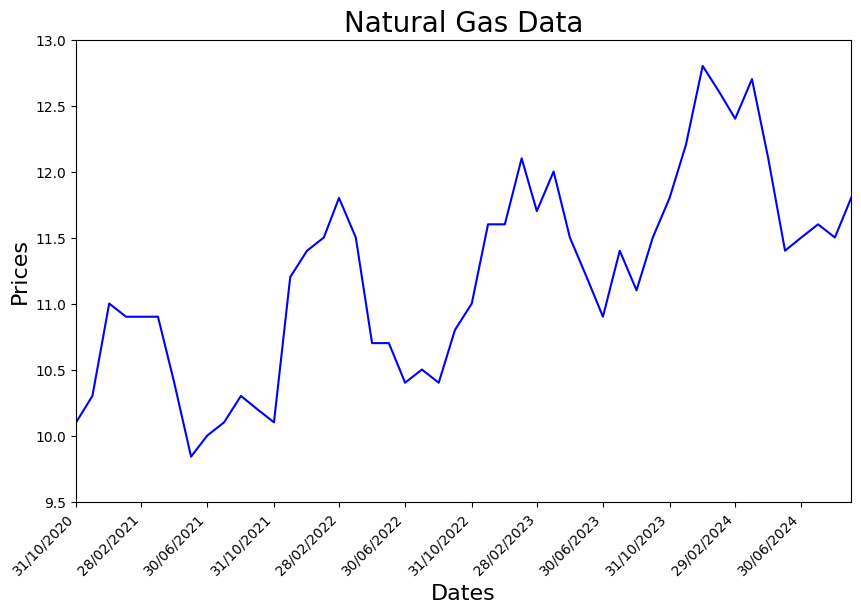

In [7]:
# import relevant packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from google.colab import drive
import datetime

# read and check the file
drive.mount('/content/drive', force_remount = True)
file_path = '/content/drive/My Drive/Forage/Nat_Gas.csv'
nat_gas_data = pd.read_csv(file_path)
print(nat_gas_data.head())

# visualise the data
prices = nat_gas_data['Prices']
dates = nat_gas_data['Dates']
dates = pd.to_datetime(dates)

plt.figure(figsize = (10, 6))
plt.plot(dates, prices, color = 'b')
plt.xlim(dates.min(), dates.max())
plt.ylim(9.5, 13)
ticks = pd.date_range(start = dates.min(), end = dates.max(), freq = '4ME')
labels = [d.strftime('%d/%m/%Y') for d in ticks]
plt.xticks(ticks, labels, rotation = 45, ha = 'right')
plt.yticks(np.arange(9.5, 13.5, 0.5))
plt.xlabel('Dates', fontsize = 16)
plt.ylabel('Prices', fontsize = 16)
plt.title('Natural Gas Data', fontsize = 20)
plt.show()

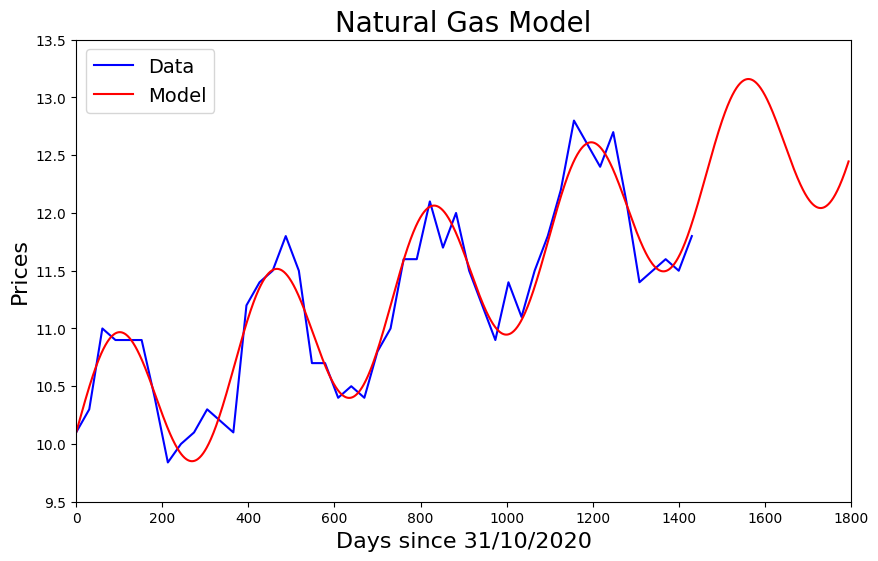

In [8]:
# model the data (seasonal trend + yearly increase)
def curve(x, a, b, c, d):
  return a + b * x + c * np.sin((2 * np.pi/365) * x + d)

xdata = (dates - dates.min()) / np.timedelta64(1, 'D')
ydata = prices
popt, pcov = curve_fit(curve, xdata, ydata)

a_fit, b_fit, c_fit, d_fit = popt
x_fit = np.arange(0, max(xdata) + 365, 1)
y_fit = curve(x_fit, a_fit, b_fit, c_fit, d_fit)

plt.figure(figsize = (10, 6))
plt.plot(np.linspace(0, max(xdata), 48), prices, label = 'Data', color = 'b')
plt.plot(x_fit, y_fit, label = 'Model', color = 'r')
plt.xlim(0, 1800)
plt.ylim(9.5, 13.5)
plt.xticks(np.arange(0, 2000, 200))
plt.yticks(np.arange(9.5, 14, 0.5))
plt.xlabel('Days since 31/10/2020', fontsize = 16)
plt.ylabel('Prices', fontsize = 16)
plt.title('Natural Gas Model', fontsize = 20)
plt.legend(loc = 'upper left', fontsize = 14)
plt.show()

In [9]:
# test the model
print('This program gives you a price estimate of natural gas from 31st October 2020 to 30th September 2025.\nMake sure the date you type is in the format DD/MM/YYYY, e.g. 14/05/2023.')

while True:
  try:
    date = input('Please enter a date between 31/10/2020 to 30/09/2025: ')
    start = datetime.date(2020, 10, 31)
    end = datetime.date(2025, 9, 30)
    if start <= datetime.datetime.strptime(date, '%d/%m/%Y').date() <= end:
      break
    else:
      print('Date outside valid range.')
  except ValueError:
    print('This is not a valid date.')

date_fit = (pd.to_datetime(date, dayfirst = True) - dates.min()) / np.timedelta64(1, 'D')
price_estimate = round(curve(date_fit, a_fit, b_fit, c_fit, d_fit), 1)
print('The price is {}.'. format(price_estimate))

This program gives you a price estimate of natural gas from 31st October 2020 to 30th September 2025.
Make sure the date you type is in the format DD/MM/YYYY, e.g. 14/05/2023.
Please enter a date between 31/10/2020 to 30/09/2025: 30/09/2025
The price is 12.5.
